In [1]:
import evalFunctions as ef
import os
import json
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from pyvis.network import Network
import networkx as nx
from collections import Counter

In [2]:
stop_words = set(stopwords.words('english'))
pathlist = []
for i in range(0,7):
    filename_source = 'sentenceswithnames'+str(i)+'.txt'
    filepath_source = os.path.join('Data','RESULTS',filename_source)
    filename_target = 'unigram_mtx'+str(i)+'.txt'
    filepath_target = os.path.join('Data','RESULTS',filename_target)
    pathlist.append(filepath_target)  
    if not os.path.exists(filepath_target):
        print('not exists')
        # Statistischee Analysen gesamter Text
        with open(filepath_source,'r',encoding='utf-8') as f:
            content = f.read()
        # Sätze erstellen
        sents = nltk.sent_tokenize(content) # Output is a list of sentences
        print(len(sents))
        # print(type(sents))
        # print(sents)
        unigrammtx = ef.unigramMatrix(sents)
        print(len(unigrammtx))
        with open(filepath_target,'w',encoding='utf-8') as f:
            for word in unigrammtx:
                f.write(word)
                f.write('\n')
filepath_master = os.path.join('Data','RESULTS','unigram_mtx.txt')
# if os.path.exists(filepath_master):
if not os.path.exists(filepath_master):
    print(pathlist)
    with open(filepath_master,'a') as f:
        for filepath in pathlist:
            with open(filepath,'r') as input:
                f.write(input.read())

In [3]:
with open(os.path.join('Data','RESULTS','unigram_mtx.txt'),'r',encoding='utf-8') as f:
    content = f.readlines() #.replace('\n','')
ngram_mtx = []
for line in content:
    ngram_mtx.append(line.replace('\n',''))

print(len(ngram_mtx))

630316


In [4]:
# Filter auf die Unigramme
uallmtx = ef.ngramFilter(ngram_mtx)

print(type(uallmtx))

<class 'list'>


In [5]:

# Ngramme initialisieren
# print('unimtx')
# unimtx_freq,mtx_bigram = ef.initNgrams(unigrammtx)
print('uallmtx')
uall_fmtxreq,uallmtx_bigram = ef.initNgrams(uallmtx)
# print('unamesmtx')
# unamesmtx_freq,unamesmtx_bigram = ef.initNgrams(unamesmtx)
# print('uadmtx')
# uadmtx_freq,uadmtx_bigram = ef.initNgrams(uadmtx)


# print(uallmtx_bigram)

uallmtx


len connection
7199


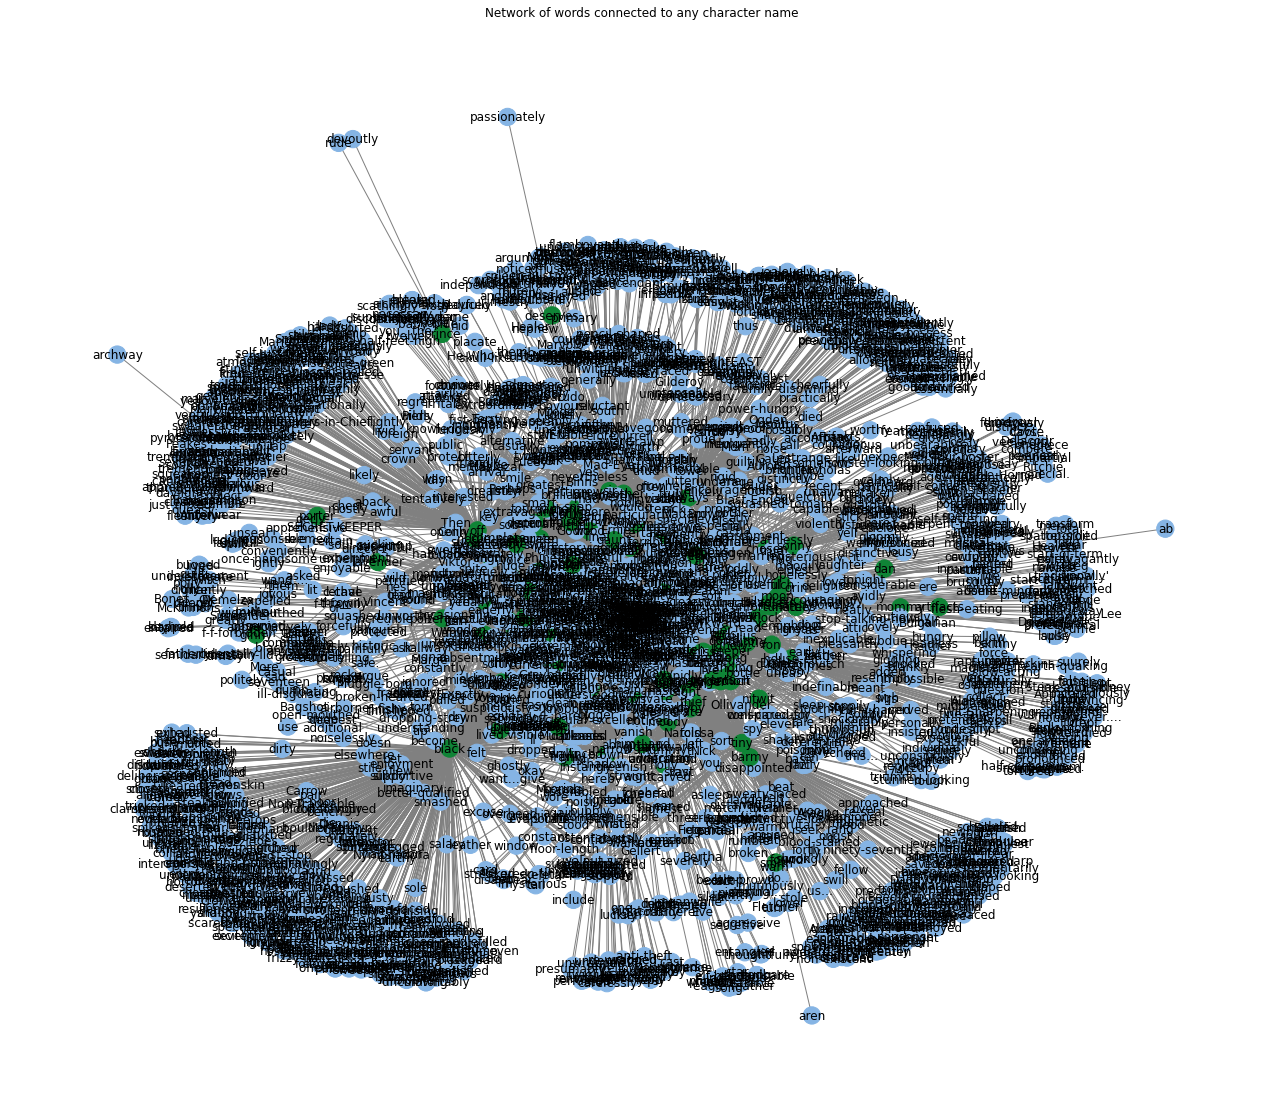

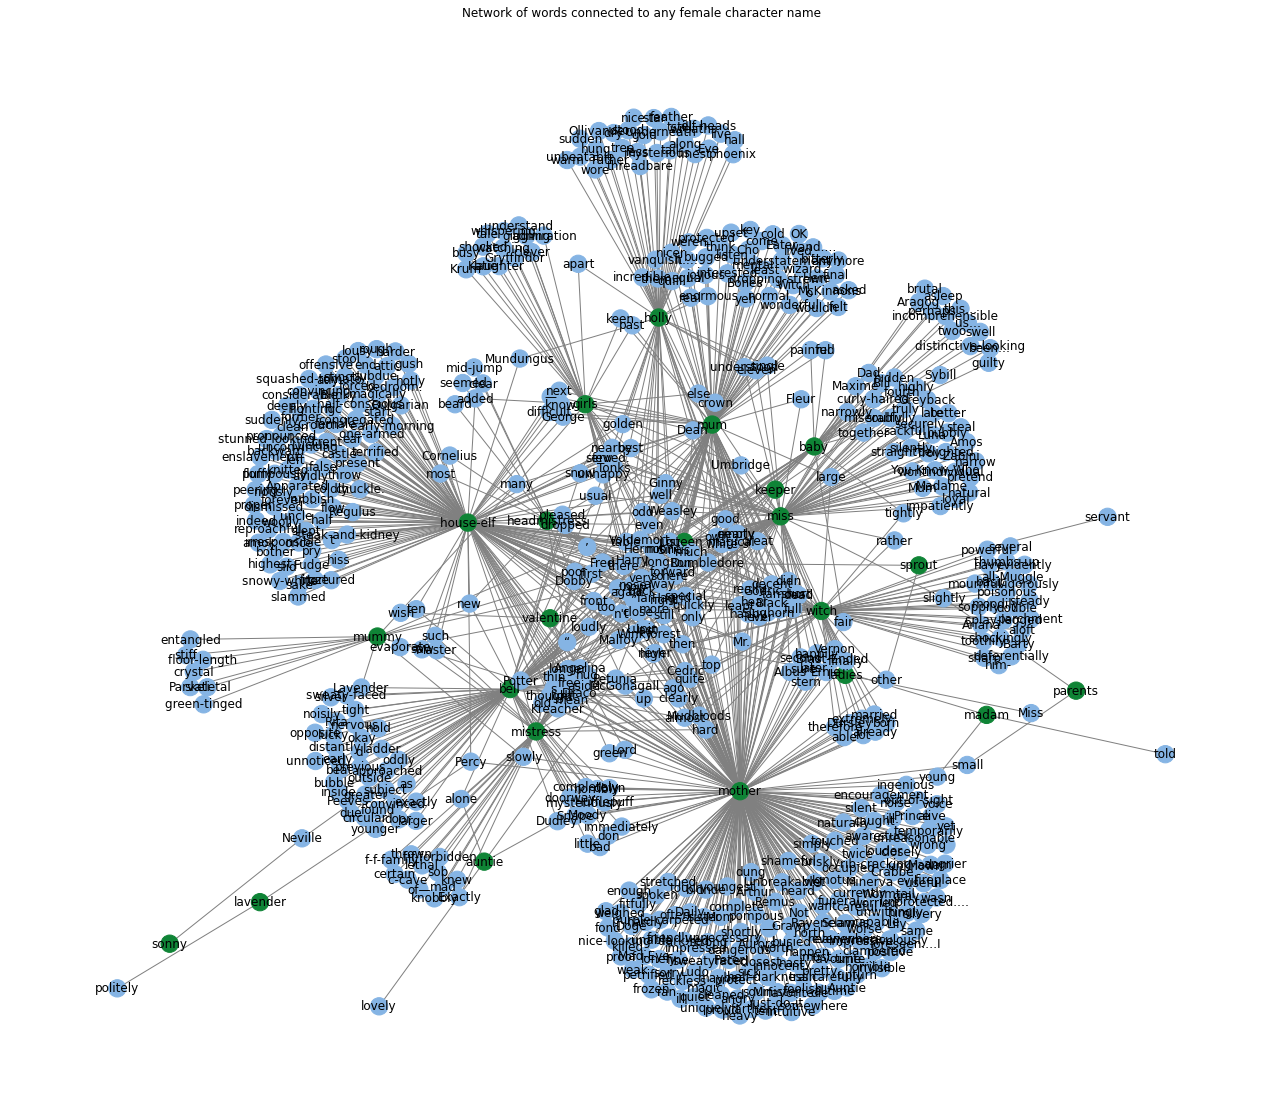

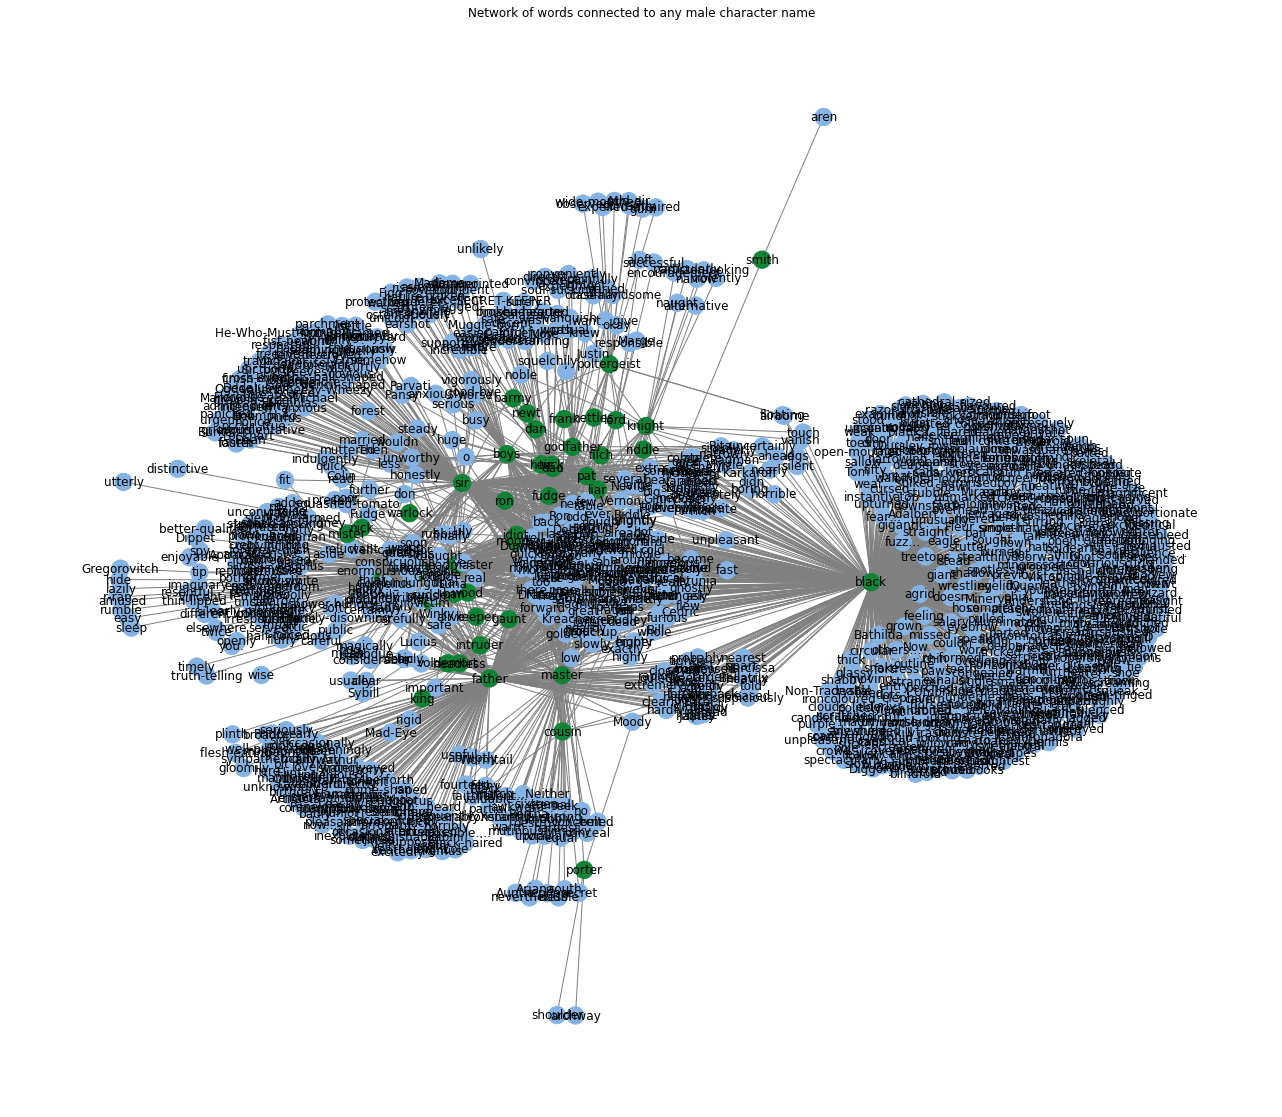

In [6]:
def createNetworkGraph(bigram):
    # print('len bigram')
    # print(len(bigram))
    
    # Gewichtung
    weight = {}
    # Tuple-Dictionaries
    connection = {}
    connection_f = {}
    connection_m = {}
    # Filter values
    fv_names, fv_adv, fv_adj, female, male, res = ef.getFilterValues(1,0,0,1,1) # funktionuggelt
    # print(fv_names) # funktionuggelt
    # Graphen
    g = nx.Graph()
    g_f = nx.Graph()
    g_m = nx.Graph()
    # Kennzahlen
    weight_of_nodes = []
    # Farben Variablen
    lblue = '#85B4E4'
    dgreen = '#0F8436'
    for tuple in bigram:
        weight = 0
        # print('1')
        # print(tuple[0])
        # print('2')
        # print(tuple[1])
        # TODO Gewichtung überprüfen
        # TODO Graphen umstrukturieren
        if tuple[0] in fv_names and not tuple[1] in fv_names:
            # print('criteria met')
            # weiblich
            if tuple[0] in female:
                connection_f.update({tuple:weight})
                weight = connection_f.get(tuple)
                weight += 1
                connection_f.update({tuple:weight})
            # männlich
            if tuple[0] in male:
                connection_m.update({tuple:weight})
                weight = connection_m.get(tuple)
                weight += 1
                connection_m.update({tuple:weight})
            # allgemein
            # print(connection)
            connection.update({tuple:weight})
            weight = connection.get(tuple)
            weight += 1
            connection.update({tuple:weight})
        if tuple[1] in fv_names and not tuple[0] in fv_names:
            # print('criteria met')
            # weiblich
            if tuple[0] in female:
                n_tuple = (tuple[1],tuple[0])
                connection_f.update({n_tuple:weight})
                weight = connection_f.get(n_tuple)
                weight += 1
                connection_f.update({n_tuple:weight})
            # männlich
            if tuple[0] in male:
                n_tuple = (tuple[1],tuple[0])
                connection_m.update({n_tuple:weight})
                weight = connection_m.get(n_tuple)
                weight += 1
                connection_m.update({n_tuple:weight})
            # allgemein
            n_tuple = (tuple[1],tuple[0])
            connection.update({n_tuple:weight})
            weight = connection.get(n_tuple)
            weight += 1
            connection.update({n_tuple:weight})
    print('len connection')
    print(len(connection))
    # Alle Personen-Graph
    color_map = []
    l_of_names = []
    l_of_words = []
    for key in connection:
        value = connection.get(key)
        g.add_node(key[0], cluster='noun')
        g.add_node(key[1], cluster='ad')
        g.add_edge(key[1],key[0],weight=value)
        weight_of_nodes.append(value)
        # Color-Mapping
        if key[1] in fv_names: # Paar aus Namen
            # Name 1 bereits erfasst?
            if not key[0] in l_of_names: # Wenn nein
                color_map.append(dgreen) # TODO Farbe ändern
                l_of_names.append(key[0])
            # Name 2 bereits erfasst?
            if not key[1] in l_of_names: # Wenn nein
                color_map.append(dgreen)
                l_of_names.append(key[1])
        else: # nur 1 Name
            if not key[0] in l_of_names:
                color_map.append(dgreen)
                l_of_names.append(key[0])
            #Color-Mapping für alle anderen Wörter
            if not key[1] in l_of_words: 
                color_map.append(lblue)
                l_of_words.append(key[1])
    # Kennzahlen und Algos
    # print(weight_of_nodes)
    # Graphen darstellen
    fig = plt.figure(figsize=(50,20))
    subax1 = plt.subplot(122)
    nx.draw(g, node_color=color_map, edge_color ='grey', with_labels=True)
    subax1.set_title('Network of words connected to any character name')
    # plt.savefig('wordconnectivity_all.png')
    # Frauen-Graph    
    color_map = []
    l_of_names = []
    l_of_words = []
    weight_of_nodes = []
    for key in connection_f:
        value = connection_f.get(key)
        g_f.add_node(key[0], cluster='noun')
        g_f.add_node(key[1], cluster='ad')
        g_f.add_edge(key[0],key[1],weight=value)
        weight_of_nodes.append(value)
        # Color-Mapping
        if key[1] in fv_names: # Paar aus Namen
            # Name 1 bereits erfasst?
            if not key[0] in l_of_names: # Wenn nein
                color_map.append(dgreen) # TODO Farbe ändern
                l_of_names.append(key[0])
            # Name 2 bereits erfasst?
            if not key[1] in l_of_names: # Wenn nein
                color_map.append(dgreen)
                l_of_names.append(key[1])
        else: # nur 1 Name
            if not key[0] in l_of_names:
                color_map.append(dgreen)
                l_of_names.append(key[0])
            #Color-Mapping für alle anderen Wörter
            if not key[1] in l_of_words: 
                color_map.append(lblue)
                l_of_words.append(key[1])
    # print(weight_of_nodes)
    fig = plt.figure(figsize= (50,20))
    subax1 = plt.subplot(122)
    nx.draw(g_f, node_color=color_map, edge_color ='grey', with_labels=True)
    subax1.set_title('Network of words connected to any female character name')
    # plt.savefig('wordconnectivity_women.png')
    # Männer-Graph
    color_map = []
    l_of_names = []
    l_of_words = []
    weight_of_nodes = []
    for key in connection_m:
        value = connection_m.get(key)
        g_m.add_node(key[0], cluster='noun', color='red')
        g_m.add_node(key[1], cluster='ad', color='red')
        g_m.add_edge(key[0],key[1],weight=value)
        weight_of_nodes.append(value)
    # Color-Mapping
        if key[1] in fv_names: # Paar aus Namen
            # Name 1 bereits erfasst?
            if not key[0] in l_of_names: # Wenn nein
                color_map.append(dgreen)
                l_of_names.append(key[0])
            # Name 2 bereits erfasst?
            if not key[1] in l_of_names: # Wenn nein
                color_map.append(dgreen)
                l_of_names.append(key[1])
        else: # nur 1 Name
            if not key[0] in l_of_names:
                color_map.append(dgreen)
                l_of_names.append(key[0])
            #Color-Mapping für alle anderen Wörter
            if not key[1] in l_of_words: 
                color_map.append(lblue)
                l_of_words.append(key[1])
    # print(weight_of_nodes)
    fig = plt.figure(figsize= (50,20))
    subax1 = plt.subplot(122)
    nx.draw(g_m, node_color=color_map, edge_color ='grey', with_labels=True)
    subax1.set_title('Network of words connected to any male character name')
    # plt.savefig('wordconnectivity_men.png')
    return g, g_f, g_m

# wordnet = nltk.pywordnet()

graph_all, graph_female, graph_male = createNetworkGraph(uallmtx_bigram)


In [7]:
# Analyse
# attribute assortativity coefficient
aac = nx.attribute_assortativity_coefficient(graph_all,"cluster")
print(f'attribute assortativity coefficient: {aac}')
aac_f = nx.attribute_assortativity_coefficient(graph_female,"cluster")
print(f'attribute assortativity coefficient: {aac_f}')
aac_m = nx.attribute_assortativity_coefficient(graph_male,"cluster")
print(f'attribute assortativity coefficient: {aac_m}')

attribute assortativity coefficient: -1.0
attribute assortativity coefficient: -1.0
attribute assortativity coefficient: -1.0


In [8]:
# degree assortativity coefficient
dac = nx.degree_assortativity_coefficient(graph_all)
print(f'degree assortativity coefficient: {dac}')
dac_f = nx.degree_assortativity_coefficient(graph_female)
print(f'degree assortativity coefficient: {dac_f}')
dac_m = nx.degree_assortativity_coefficient(graph_male)
print(f'degree assortativity coefficient: {dac_m}')

degree assortativity coefficient: -0.4562783659677931
degree assortativity coefficient: -0.5247131439843365
degree assortativity coefficient: -0.4148059263547138


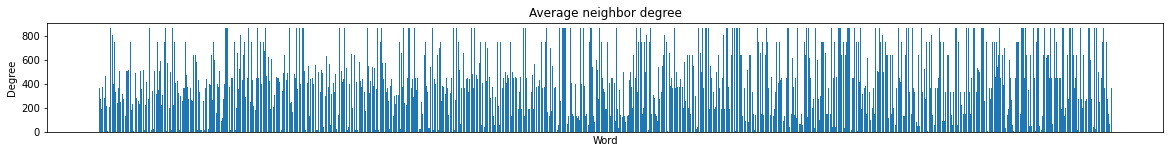

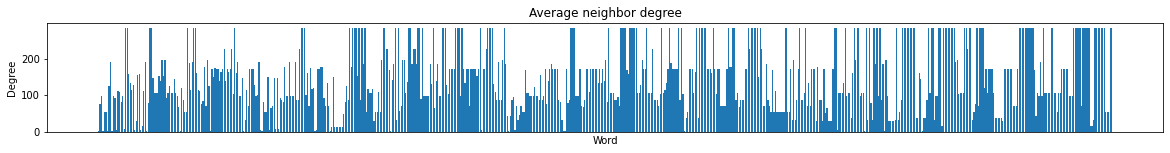

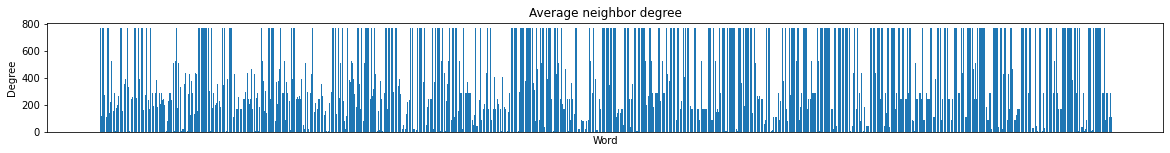

In [9]:
def calcAND(graph):
    # average_neighbor_degree
    x = []
    y = []
    andeg = nx.average_neighbor_degree(graph)
    for key,value in andeg.items():
        x.append(key) 
        y.append(value)
    fig = plt.figure(figsize = (20,2))
    plt.bar(x,y)
    plt.title("Average neighbor degree")
    plt.xlabel("Word")
    plt.ylabel("Degree")
    plt.tick_params(axis='x', bottom = False, labelbottom = False)
    plt.show()

calcAND(graph_all)
calcAND(graph_female)
calcAND(graph_male)

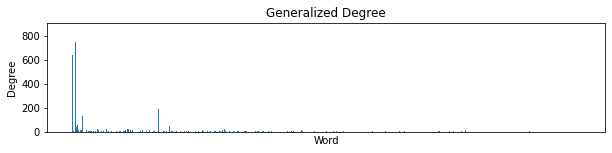

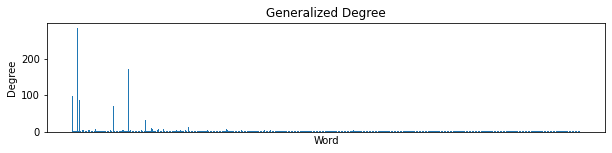

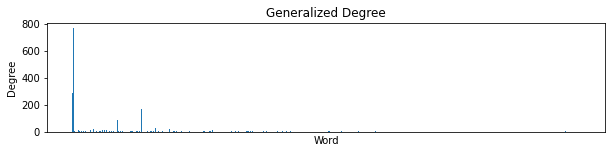

In [10]:
def calcGD(graph):
    # generalized_degree
    x = []
    y = []
    gd = nx.generalized_degree(graph)
    for key,value in gd.items():
        x.append(key) 
        y.append(value[0])
    fig = plt.figure(figsize = (10,2))
    plt.bar(x,y)
    plt.title("Generalized Degree")
    plt.xlabel("Word")
    plt.ylabel("Degree")
    plt.tick_params(axis='x', bottom = False, labelbottom = False)
    plt.show()

calcGD(graph_all)
calcGD(graph_female)
calcGD(graph_male)

In [11]:
# Diameter
dia = nx.diameter(graph_all)
print(f'Diameter: {dia}')
dia_f = nx.diameter(graph_female)
print(f'Diameter: {dia_f}')
dia_m = nx.diameter(graph_male)
print(f'Diameter: {dia_m}')

Diameter: 6
Diameter: 7
Diameter: 6


In [ ]:
'''
# nicht performant
# Average Node-Connectivity
anc = nx.average_node_connectivity(graph_all)

print(type(anc))
'''

In [ ]:
ec = nx.edge_connectivity(graph_all)
print(f'Edge connectitvity: {ec}')
ec_f = nx.edge_connectivity(graph_female)
print(f'Edge connectitvity: {ec_f}')
ec_m = nx.edge_connectivity(graph_male)
print(f'Edge connectitvity: {ec_m}')

Edge connectitvity: 1
Edge connectitvity: 1
Edge connectitvity: 1


In [ ]:
# Cliques
l_clique = list(nx.find_cliques(graph_all))
# print(l_clique)
l_clique_f = list(nx.find_cliques(graph_female))
# print(l_clique_f)
l_clique_m = list(nx.find_cliques(graph_male))
# print(l_clique_m)

sim_a_f = [item for item in l_clique if item in l_clique_f] 
print(len(l_clique),len(l_clique_f),len(sim_a_f))
sim_a_m = [item for item in l_clique if item in l_clique_m] 
print(len(l_clique),len(l_clique_m),len(sim_a_m))
sim_f_m = [item for item in l_clique_f if item in l_clique_m] 
print(len(l_clique_f),len(l_clique_m),len(sim_f_m))

clique_similarity_a_f = float(len(sim_a_f) / (len(l_clique)+len(l_clique_f)-len(sim_a_f))) * 100
print(f'Similarity between network of all character names and network of female character names: {clique_similarity_a_f}')
clique_similarity_a_m = float(len(sim_a_m) / (len(l_clique)+len(l_clique_m)-len(sim_a_m))) * 100
print(f'Similarity between network of all character names and network of female character names: {clique_similarity_a_m}')
clique_similarity_f_m = float(len(sim_f_m) / (len(l_clique_f)+len(l_clique_m)-len(sim_f_m))) * 100
print(f'Similarity between network of all character names and network of female character names: {clique_similarity_f_m}')

n_clique = nx.graph_number_of_cliques(graph_all)
print(f'Number of Cliques per graph: {n_clique}')
n_clique_f = nx.graph_number_of_cliques(graph_female)
print(f'Number of Cliques per graph: {n_clique_f}')
n_clique_m = nx.graph_number_of_cliques(graph_male)
print(f'Number of Cliques per graph: {n_clique_m}')

7199 1044 729
7199 2203 2019
1044 2203 148
Similarity between network of all character names and network of female character names: 9.701889805696034
Similarity between network of all character names and network of female character names: 27.346607070296624
Similarity between network of all character names and network of female character names: 4.775734107776702
Number of Cliques per graph: 7199
Number of Cliques per graph: 1044
Number of Cliques per graph: 2203


In [ ]:
# Transitivity -- nicht aussagekräftig
trans = nx.transitivity(graph_all)
print(trans)
trans_f = nx.transitivity(graph_female)
print(trans_f)
trans_m = nx.transitivity(graph_male)
print(trans_m)

0
0
0


In [ ]:
# Clustering -- nicht aussagekräftig
clu = nx.clustering(graph_all)
print(clu)
# clu_f = nx.clustering(graph_female)
# print(clu_f)
# clu_m = nx.clustering(graph_male)
# print(clu_m)

In [ ]:

# # Average Clustering
# avgcluster = nx.average_clustering(graph)

avgclu = nx.average_clustering(graph_all)
print(avgclu)
avgclu_f = nx.average_clustering(graph_female)
print(avgclu_f)
avgclu_m = nx.average_clustering(graph_male)
print(avgclu_m)

0.0
0.0
0.0
